# Lendal Case study
## project by Beng Cheong Cheong and Geraldine Bengsch

# Aims of the project

In [1]:
# import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read data
loan = pd.read_csv('loan.csv')

C:\Users\sebas\anaconda3\envs\general\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# see the data with all columns
pd.set_option('display.max_columns', None)
# display first five rows
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
# columns to work on:
# loan_amnt, pub_rec, pub_rec_bankruptcies, revol_bal, mths_since_last_delinq, purpose
# delinq_2yrs, delinq_amnt, grade, subgrade, annual_inc
# inq_last_6mths??? 
# total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int,total_rec_late_fee
# collection_recovery_fee

# columns with only one value
# pymnt_plan, tax_liens, initial_list_status- empty



In [5]:
# DATA EXPLORATION
# Here, we want to know which data column contains which types of data so that we can decide if they should be categorical,
# numerical, ordinal variables

column_idx = 0
while column_idx <= loan.shape[1]:
    end_range = column_idx + 10
    print("-----")
    print("Printing column data types for {} to {}".format(column_idx, end_range-1))
    print("-----")
    print(loan.iloc[:,column_idx:end_range].info())
    column_idx = end_range 

-----
Printing column data types for 0 to 9
-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               39717 non-null  int64  
 1   member_id        39717 non-null  int64  
 2   loan_amnt        39717 non-null  int64  
 3   funded_amnt      39717 non-null  int64  
 4   funded_amnt_inv  39717 non-null  float64
 5   term             39717 non-null  object 
 6   int_rate         39717 non-null  object 
 7   installment      39717 non-null  float64
 8   grade            39717 non-null  object 
 9   sub_grade        39717 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.0+ MB
None
-----
Printing column data types for 10 to 19
-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------

In [6]:
#filtering list of columns that are not allempty
cols_non_empty = loan.columns[loan.isna().sum() < loan.shape[0]]
print(list(cols_non_empty))

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens']


# Feature Engineering

In [7]:
# selecting columns that have at least one value and are not empty
df = loan[cols_non_empty]
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.0,0.0,13,0,7274,13.10%,40,f,0.00,0.00,2822.969293,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,NaN,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.0,0.0,6,0,8847,26.90%,9,f,0.00,0.00,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,NaN,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A

In [8]:
#looping through all the columns to find out if the values are all unique, and if there are many NaN values
for col in df.columns:
    print("{}: {} unique values".format(col,df[col].nunique()))
    print(df[col].describe())
    print("\n")

id: 39717 unique values
count    3.971700e+04
mean     6.831319e+05
std      2.106941e+05
min      5.473400e+04
25%      5.162210e+05
50%      6.656650e+05
75%      8.377550e+05
max      1.077501e+06
Name: id, dtype: float64


member_id: 39717 unique values
count    3.971700e+04
mean     8.504636e+05
std      2.656783e+05
min      7.069900e+04
25%      6.667800e+05
50%      8.508120e+05
75%      1.047339e+06
max      1.314167e+06
Name: member_id, dtype: float64


loan_amnt: 885 unique values
count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


funded_amnt: 1041 unique values
count    39717.000000
mean     10947.713196
std       7187.238670
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64


funded_amnt_inv: 8205 unique values
count    3971

# EXPLORATORY DATA ANALYSIS
## Steps Taken
### The following features were selected by us from our online research on the possible factors of a borrower defaulting loan payments
 1. Purpose (Charged off vs Fully Paid)
 2. Interest rate (Charged Off vs Fully Paid) - to see the spread of the different data points of the interest rate
 3. the Term (Charged Off vs Fully Paid)
 4. Loan Amount (Charged Off vs Fully Paid) - 3 groups (High,Medium,Low)
 5. Bankruptcies (pub_rec_bankruptcies)
 6. Delinquencies 

In [9]:
import plotly.express as px

## Overview of loan statuses
Majority of loans given out have been fully paid at 83.0%, with 14.2% of loans defaulted.

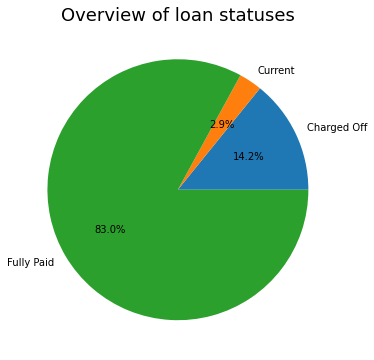

In [10]:
fig, ax = plt.subplots(figsize=(6, 6))
df.groupby('loan_status').count()['id'].plot.pie(autopct='%.1f%%')
ax.set_title('Overview of loan statuses', fontsize=18)
ax.set_ylabel('')
plt.show()

## Loan statuses over the years
As we examined the loans given out the years, the majority of loans came in the early 2000s. 
Even in the early 2000s, the proportion of loans that were fully-paid or charged off remained largely the same.

C:\Users\sebas\anaconda3\envs\general\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


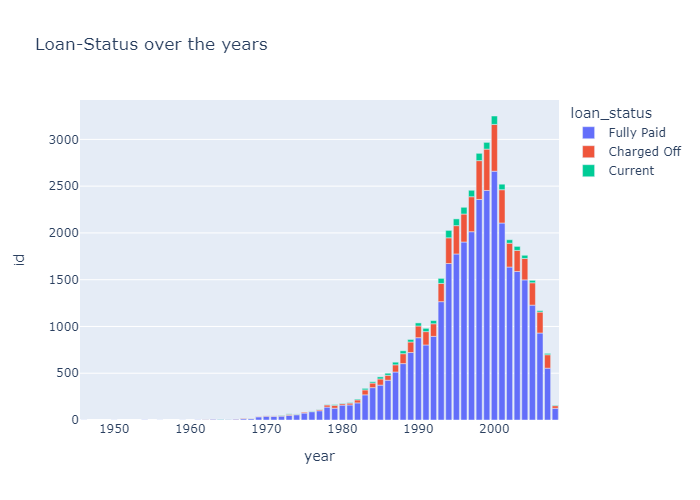

In [11]:
df['year'] = df['earliest_cr_line'].apply(lambda x: x.split("-")[-1])
df['year'] = df['year'].astype('int').apply(lambda x: x+1900 if x>=10 else x+2000)
df_year = df.groupby(['year','loan_status']).count()['id'].reset_index()

fig = px.bar(df_year, x="year", y="id", color="loan_status", title="Loan-Status over the years")
fig.show('png')

## Loan amount given out
The majority of the loans that were given out are below $10,000

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

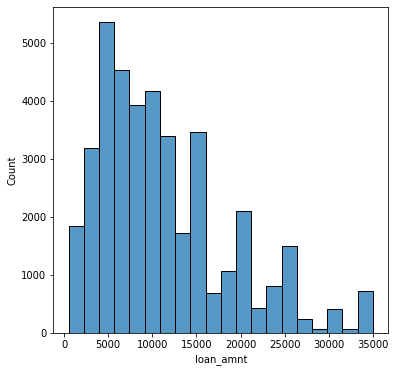

In [12]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.histplot(data=df, x="loan_amnt", bins=20)

C:\Users\sebas\anaconda3\envs\general\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



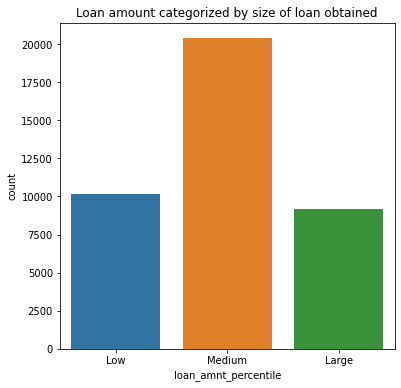

In [13]:
#we are dividing loan amount by each cutoff point at each percentile - 25th and below, 25th to 75th and 75th and above
df['loan_amnt_percentile'] = pd.qcut(df['loan_amnt'],[0,.25,.75,1], labels=['Low','Medium','Large'])  

fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.countplot(x='loan_amnt_percentile', data=df)
plt.title("Loan amount categorized by size of loan obtained")
plt.show()

## Purpose for obtaining loan
When we exmaine the purpose given for obtaining the loans, the majority of borrowers in each of the three categories borrowed it for the reason "Debt Consolidation". 

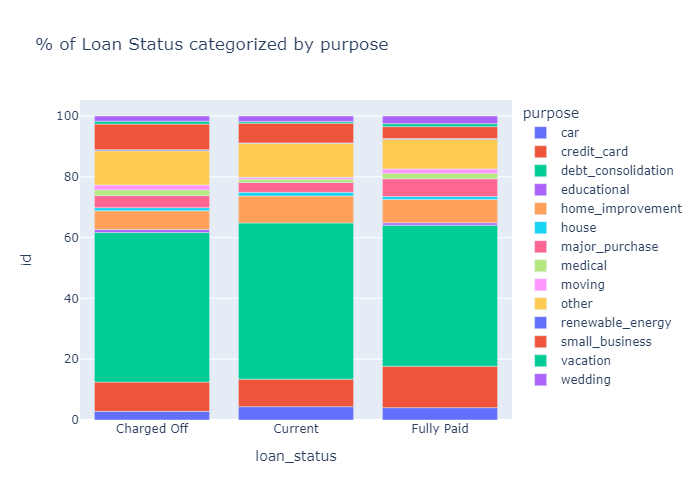

In [14]:
#df.groupby(['loan_status','purpose']).count()['id'].unstack().plot(kind='bar', stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))
df_purpose = df.groupby(['loan_status','purpose']).count()['id']
df_purpose = df_purpose.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()
fig = px.bar(df_purpose, x="loan_status", y="id", color="purpose", title="% of Loan Status categorized by purpose")
fig.show('png')

## Level of interest-rate when first obtaining loans
However, when we looked at the level of interest-rate when the loans were first being obtained, we can see that those who were able to pay back fully obtained at the much lower median interest-rate, and even the interest-rate at 75th-percentile was around the same as the median of those who were charged off.

C:\Users\sebas\anaconda3\envs\general\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 1.0, 'Interest rate categorized by loan status')

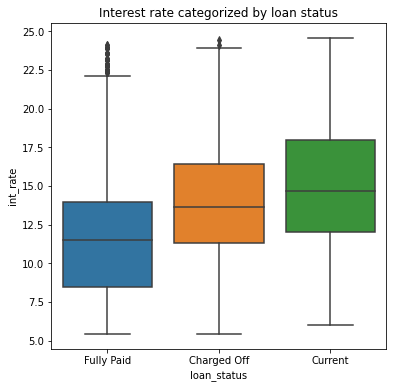

In [23]:
df['int_rate'] = df['int_rate'].apply(lambda x: float(x.replace("%","")) if type(x) == str else x)
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.boxplot(x="loan_status", y="int_rate", data=df)
plt.title("Interest rate categorized by loan status")

## Level of DTI when first obtaining loans
However, when we looked at the level of DTI when the loans were first being obtained, we can see that those who were able to pay back fully obtained at the much lower median DTI than those who were charged off.

Text(0.5, 1.0, 'DTI categorized by loan status')

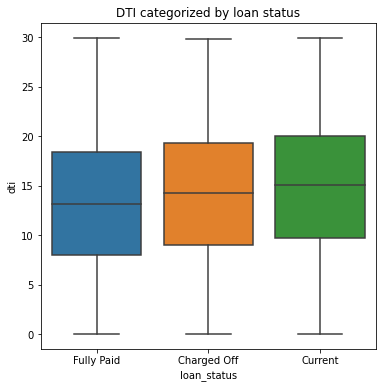

In [24]:
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.boxplot(x="loan_status", y="dti", data=df)
plt.title("DTI categorized by loan status")

## Loan terms across each category
When we observed the loan terms, a higher proportion of loan terms that were fully paid belonged were 36 months in total. 
An almost equal proportion of loan terms that were charged off. 

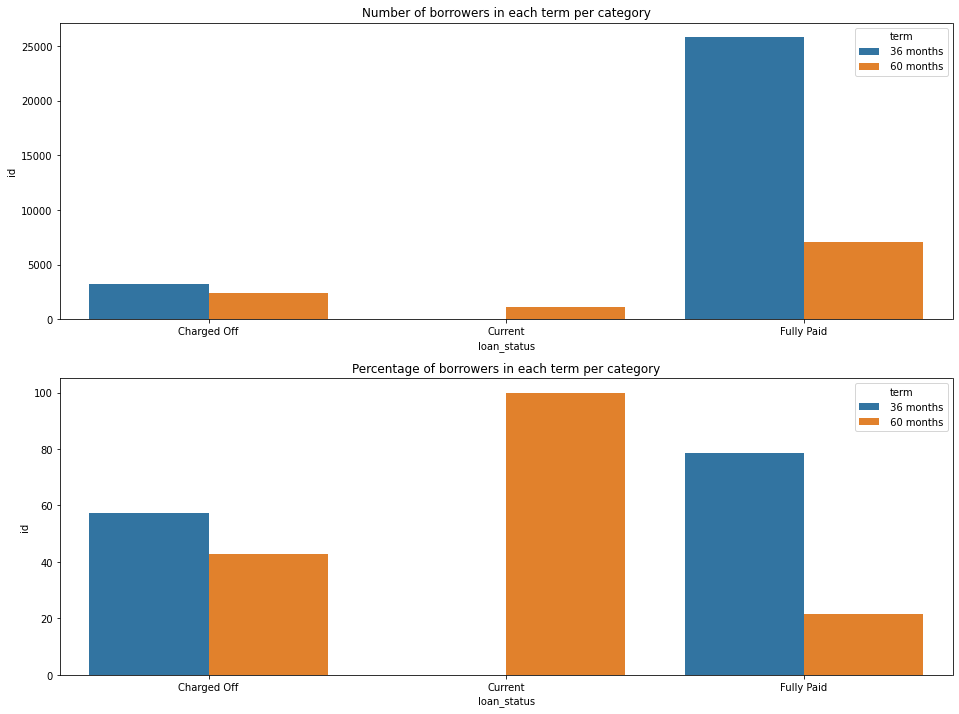

In [25]:
fig, (ax1,ax2) = plt.subplots(2, figsize=(16, 12))
df_term = df.groupby(['loan_status','term']).count()['id']
ax1.title.set_text("Number of borrowers in each term per category")
sns.barplot(x='loan_status', y='id', hue='term', data=df_term.reset_index(), ax=ax1)

df_term_perc = df_term.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()
ax2.title.set_text("Percentage of borrowers in each term per category")
sns.barplot(x='loan_status', y='id', hue='term', data=df_term_perc, ax=ax2)
plt.show()

## Grade across each category
When we observed the grades, there was a higher proportion of fully paid borrwers that were in Grades A and B, lower from Grade E to G.
However, when we were observing the grades for 'charged off' borrowers, there were lower proportions of borrowers in Grades A and B.

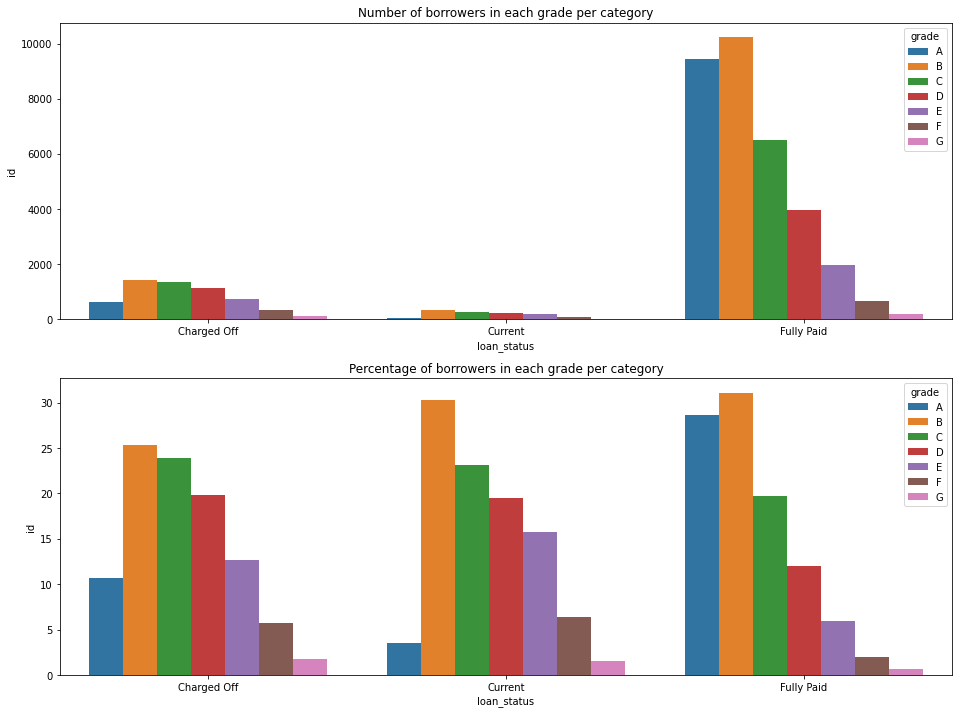

In [26]:
fig, (ax1,ax2) = plt.subplots(2, figsize=(16, 12))
df_grade= df.groupby(['loan_status','grade']).count()['id']
ax1.title.set_text("Number of borrowers in each grade per category")
sns.barplot(x='loan_status', y='id', hue='grade', data=df_grade.reset_index(), ax=ax1)

df_grade_perc = df_grade.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()
ax2.title.set_text("Percentage of borrowers in each grade per category")
sns.barplot(x='loan_status', y='id', hue='grade', data=df_grade_perc, ax=ax2)
plt.show()

Some conclusions for now:
The trend for borrrowers under 'Current' status reflect much closely to 'Charged off'

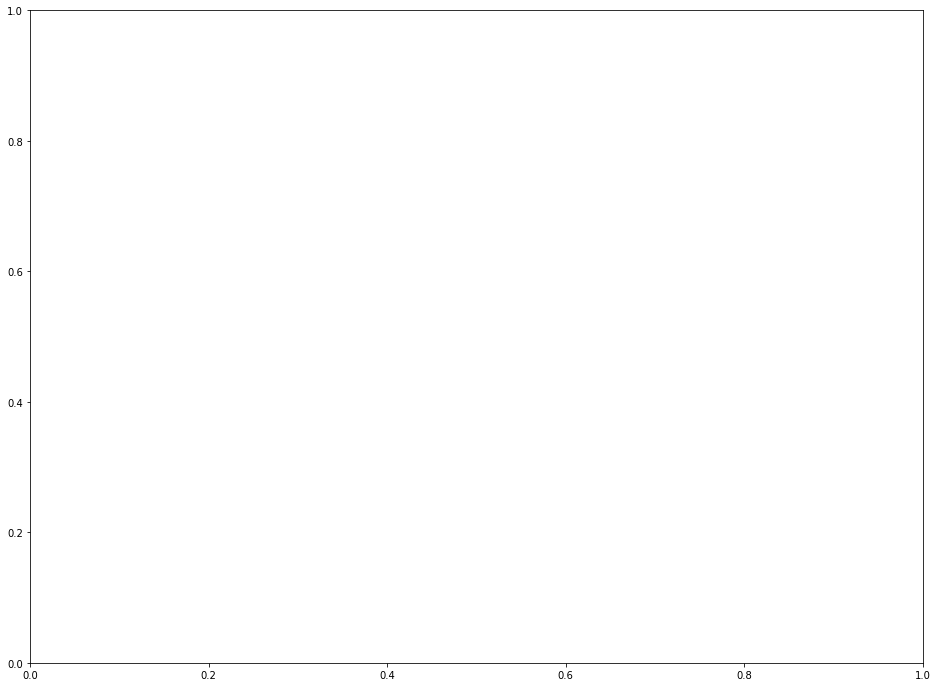

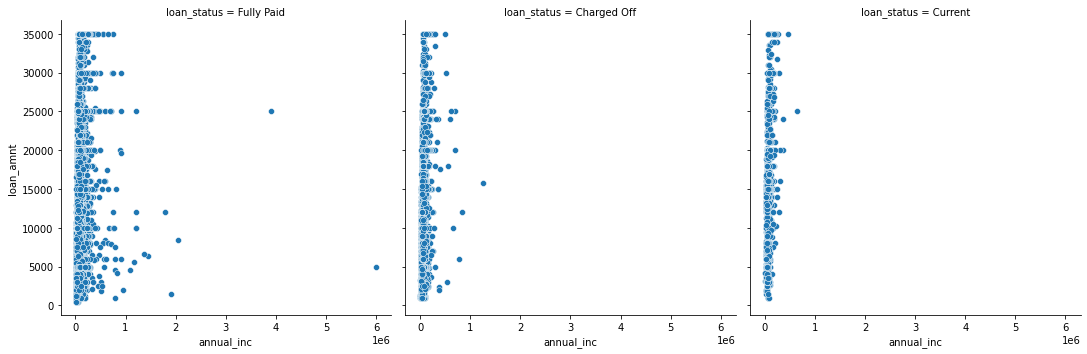

In [40]:
fig, ax = plt.subplots(figsize=(16, 12))
sns.relplot(data=df, x="annual_inc", y = "loan_amnt", col='loan_status')

In [35]:
print(list(df['annual_inc'].unique()))

[24000.0, 30000.0, 12252.0, 49200.0, 80000.0, 36000.0, 47004.0, 48000.0, 40000.0, 15000.0, 72000.0, 75000.0, 100000.0, 28000.0, 42000.0, 110000.0, 84000.0, 77385.19, 43370.0, 105000.0, 50000.0, 76000.0, 92000.0, 60000.0, 50004.0, 106000.0, 25000.0, 17108.0, 29120.0, 24044.0, 34000.0, 41000.0, 55596.0, 45000.0, 36852.0, 27000.0, 68004.0, 62300.0, 65000.0, 55000.0, 45600.0, 70000.0, 46000.0, 81000.0, 39000.0, 51400.0, 33000.0, 62000.0, 45996.0, 44544.0, 61000.0, 44000.0, 33600.0, 150000.0, 90000.0, 52000.0, 68000.0, 53000.0, 35000.0, 88365.0, 43680.0, 120000.0, 66000.0, 39120.0, 85000.0, 47800.0, 83000.0, 28800.0, 135000.0, 38000.0, 45608.0, 126000.0, 43000.0, 67000.0, 31200.0, 56964.0, 49500.0, 125000.0, 23000.0, 56000.0, 26500.0, 54000.0, 52800.0, 87000.0, 82000.0, 57000.0, 42656.4, 44400.0, 94800.0, 12000.0, 225000.0, 45900.0, 27200.0, 129000.0, 168000.0, 74000.0, 58500.0, 71000.0, 87996.0, 140000.0, 86000.0, 44200.0, 109000.0, 52500.0, 69600.0, 144000.0, 29000.0, 55200.0, 61440.0, 47